In [1]:
from langgraph.graph import StateGraph, START, MessagesState
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv

/home/rishukumar/Documents/CampusX/CampusX_Code/LangGraph_CampusX/myenv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
load_dotenv()

True

In [4]:
model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash"
)

E0000 00:00:1767721724.439431    4926 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [5]:
def call_model(state: MessagesState): # MessageState is by-default
    response = model.invoke(state["messages"])
    return {"messages": [response]}

In [6]:
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")

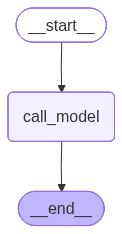

In [7]:
graph = builder.compile()
graph

In [8]:
graph.invoke({"messages": [{"role": "user", "content": "Hi! My name is Rishu."}]})

Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


{'messages': [HumanMessage(content='Hi! My name is Rishu.', additional_kwargs={}, response_metadata={}, id='976221d5-c3bb-4c17-891d-d196da7e7a5a'),
  AIMessage(content="Hi Rishu! It's great to meet you.\n\nHow can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--0f72687d-8772-4660-ab8a-58ecd4b5801f-0', usage_metadata={'input_tokens': 9, 'output_tokens': 143, 'total_tokens': 152, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 123}})]}

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTP

In [9]:
graph.invoke({"messages": [{"role": "user", "content": "What is my name?"}]})

{'messages': [HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='1e59e461-0c02-48a0-b601-14ef6be772fb'),
  AIMessage(content="As an AI, I don't know your name or any personal information about you. I don't have access to details about who you are.\n\nYou can tell me your name if you'd like me to refer to you by it during our conversation!", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--5c0f0307-9a28-49a7-8254-dcc481d699cf-0', usage_metadata={'input_tokens': 6, 'output_tokens': 240, 'total_tokens': 246, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 186}})]}

In [10]:
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": [response]}

In [11]:
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")

In [12]:
from langgraph.checkpoint.memory import InMemorySaver

checkpointer = InMemorySaver() # using this, checkpoints can be saved inside RAM
graph = builder.compile(checkpointer=checkpointer)

In [13]:

config = {"configurable": {"thread_id": "thread-1"}}
config2 = {"configurable": {"thread_id": "thread-2"}}

In [14]:
graph.invoke({"messages": [{"role": "user", "content": "Hi! My name is Rishu."}]}, config)

{'messages': [HumanMessage(content='Hi! My name is Rishu.', additional_kwargs={}, response_metadata={}, id='f2b760ef-e68c-4698-a285-0deed1aba419'),
  AIMessage(content='Hi Rishu, nice to meet you! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--8120ac60-f15a-4a31-a0c3-b49acc8bc0b0-0', usage_metadata={'input_tokens': 9, 'output_tokens': 236, 'total_tokens': 245, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 220}})]}

In [15]:
graph.invoke({"messages": [{"role": "user", "content": "What is my name?"}]}, config)

{'messages': [HumanMessage(content='Hi! My name is Rishu.', additional_kwargs={}, response_metadata={}, id='f2b760ef-e68c-4698-a285-0deed1aba419'),
  AIMessage(content='Hi Rishu, nice to meet you! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--8120ac60-f15a-4a31-a0c3-b49acc8bc0b0-0', usage_metadata={'input_tokens': 9, 'output_tokens': 236, 'total_tokens': 245, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 220}}),
  HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='81faf199-5c3d-4201-9557-552e84ff68b8'),
  AIMessage(content='Your name is Rishu.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--f8ba45

In [17]:
graph.invoke({"messages": [{"role": "user", "content": "What is my name?"}]}, config2)

{'messages': [HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='a6f9fb64-a389-4c96-b89a-6696ccea97ea'),
  AIMessage(content="As an AI, I don't have access to any personal information about you, including your name. I don't know who you are.\n\nIf you'd like me to refer to you by a specific name or nickname during our conversation, feel free to tell me!", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--59a9aac2-062c-4176-b31b-65c512703b07-0', usage_metadata={'input_tokens': 6, 'output_tokens': 436, 'total_tokens': 442, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 379}})]}

In [16]:
snap = graph.get_state(config)
vals = snap.values
for m in vals.get("messages", []):
        print("-", type(m).__name__, ":", m.content)

- HumanMessage : Hi! My name is Rishu.
- AIMessage : Hi Rishu, nice to meet you! How can I help you today?
- HumanMessage : What is my name?
- AIMessage : Your name is Rishu.
